# Loading

In [ ]:
!pip3 install leidenalg

In [ ]:
!pip install anndata
!pip install scanpy 

In [ ]:

import numpy as np
import anndata as ad
import scanpy as sc
import pandas as pd

!pip install scglue
!pip install scanpy
import anndata
import networkx as nx
import scanpy as sc
import matplotlib
from matplotlib import rcParams 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Download scRNA_seq Data


## Loading

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE153nnn/GSE153480/suppl/GSE153480_RAW.tar


--2022-04-10 07:02:17--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE153nnn/GSE153480/suppl/GSE153480_RAW.tar
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.12, 2607:f220:41f:250::230, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123054080 (117M) [application/x-tar]
Saving to: ‘GSE153480_RAW.tar.1’

GSE153480_RAW.tar.1 100%[===================>] 117.35M  11.2MB/s    in 6.7s    

2022-04-10 07:02:24 (17.6 MB/s) - ‘GSE153480_RAW.tar.1’ saved [123054080/123054080]



In [ ]:
!tar -xvf GSE153480_RAW.tar

GSM4644949_P1_1MI_barcodes.tsv.gz
GSM4644949_P1_1MI_genes.tsv.gz
GSM4644949_P1_1MI_matrix.mtx.gz
GSM4644950_P1_1Sham_barcodes.tsv.gz
GSM4644950_P1_1Sham_genes.tsv.gz
GSM4644950_P1_1Sham_matrix.mtx.gz
GSM4644951_P1_3MI_barcodes.tsv.gz
GSM4644951_P1_3MI_genes.tsv.gz
GSM4644951_P1_3MI_matrix.mtx.gz
GSM4644952_P1_3Sham_barcodes.tsv.gz
GSM4644952_P1_3Sham_genes.tsv.gz
GSM4644952_P1_3Sham_matrix.mtx.gz
GSM4644953_P8_1MI_barcodes.tsv.gz
GSM4644953_P8_1MI_genes.tsv.gz
GSM4644953_P8_1MI_matrix.mtx.gz
GSM4644954_P8_1Sham_barcodes.tsv.gz
GSM4644954_P8_1Sham_genes.tsv.gz
GSM4644954_P8_1Sham_matrix.mtx.gz
GSM4644955_P8_3MI_barcodes.tsv.gz
GSM4644955_P8_3MI_genes.tsv.gz
GSM4644955_P8_3MI_matrix.mtx.gz
GSM4644956_P8_3Sham_barcodes.tsv.gz
GSM4644956_P8_3Sham_genes.tsv.gz
GSM4644956_P8_3Sham_matrix.mtx.gz


## Matrix Merge


In [ ]:
adata_P1_1MI = sc.read_mtx('GSM4644949_P1_1MI_matrix.mtx.gz').transpose()
adata_P1_1Sham = sc.read_mtx('GSM4644950_P1_1Sham_matrix.mtx.gz').transpose()
adata_P1_3MI = sc.read_mtx('GSM4644951_P1_3MI_matrix.mtx.gz').transpose()
adata_P1_3Sham = sc.read_mtx('GSM4644952_P1_3Sham_matrix.mtx.gz').transpose()
adata_P8_1MI = sc.read_mtx('GSM4644953_P8_1MI_matrix.mtx.gz').transpose()
adata_P8_1Sham = sc.read_mtx('GSM4644954_P8_1Sham_matrix.mtx.gz').transpose()
adata_P8_3MI = sc.read_mtx('GSM4644955_P8_3MI_matrix.mtx.gz').transpose()
adata_P8_3Sham = sc.read_mtx('GSM4644956_P8_3Sham_matrix.mtx.gz').transpose()

In [ ]:
adata_P8_3Sham.obs.index=['P8_3Sham_'+ x for x in adata_P8_3Sham.obs.index]
adata_P8_3MI.obs.index=['P8_3MI_'+ x for x in adata_P8_3MI.obs.index]
adata_P8_1MI.obs.index=['P8_1MI_'+ x for x in adata_P8_1MI.obs.index]
adata_P8_1Sham.obs.index=['P8_1Sham_'+ x for x in adata_P8_1Sham.obs.index]
adata_P1_3Sham.obs.index=['P1_3Sham_'+ x for x in adata_P1_3Sham.obs.index]
adata_P1_3MI.obs.index=['P1_3MI_'+ x for x in adata_P1_3MI.obs.index]
adata_P1_1MI.obs.index=['P1_1MI_'+ x for x in adata_P1_1MI.obs.index]
adata_P1_1Sham.obs.index=['P1_1Sham_'+ x for x in adata_P1_1Sham.obs.index]


In [ ]:
adata = [adata_P8_3Sham , adata_P8_3MI , adata_P8_1MI , adata_P8_1Sham , adata_P1_3Sham , adata_P1_3MI , adata_P1_1MI , adata_P1_1Sham]
adata = ad.concat(adata )

In [ ]:
adata

AnnData object with n_obs × n_vars = 18862 × 27998

In [ ]:
barcodes_P1_1MI = pd.read_csv('GSM4644949_P1_1MI_barcodes.tsv.gz', sep='\t', header=None)
barcodes_P1_1Sham = pd.read_csv('GSM4644950_P1_1Sham_barcodes.tsv.gz', sep='\t', header=None)
barcodes_P1_3MI = pd.read_csv('GSM4644951_P1_3MI_barcodes.tsv.gz', sep='\t', header=None)
barcodes_P1_3Sham = pd.read_csv('GSM4644952_P1_3Sham_barcodes.tsv.gz', sep='\t', header=None)
barcodes_P8_1MI = pd.read_csv('GSM4644953_P8_1MI_barcodes.tsv.gz', sep='\t', header=None)
barcodes_P8_1Sham = pd.read_csv('GSM4644954_P8_1Sham_barcodes.tsv.gz', sep='\t', header=None)
barcodes_P8_3MI = pd.read_csv('GSM4644955_P8_3MI_barcodes.tsv.gz', sep='\t', header=None)
barcodes_P8_3Sham = pd.read_csv('GSM4644956_P8_3Sham_barcodes.tsv.gz', sep='\t', header=None)

In [ ]:
barcodes_P8_3Sham[0]=['P8_3Sham_'+ x for x in barcodes_P8_3Sham[0]]
barcodes_P8_3MI[0]=['P8_3MI_'+ x for x in barcodes_P8_3MI[0]]
barcodes_P8_1MI[0]=['P8_1MI_'+ x for x in barcodes_P8_1MI[0]]
barcodes_P8_1Sham[0]=['P8_1Sham_'+ x for x in barcodes_P8_1Sham[0]]
barcodes_P1_3Sham[0]=['P1_3Sham_'+ x for x in barcodes_P1_3Sham[0]]
barcodes_P1_3MI[0]=['P1_3MI_'+ x for x in barcodes_P1_3MI[0]]
barcodes_P1_1MI[0]=['P1_1MI_'+ x for x in barcodes_P1_1MI[0]]
barcodes_P1_1Sham[0]=['P1_1Sham_'+ x for x in barcodes_P1_1Sham[0]]


In [ ]:
barcodes = [barcodes_P8_3Sham , barcodes_P8_3MI , barcodes_P8_1MI , barcodes_P8_1Sham , barcodes_P1_3Sham , barcodes_P1_3MI , barcodes_P1_1MI , barcodes_P1_1Sham]
barcodes = pd.concat(barcodes)

In [ ]:
barcodes

,0
0,P8_3Sham_AAACCTGCATCGATTG-1
1,P8_3Sham_AAACCTGTCAGTTTGG-1
2,P8_3Sham_AAACGGGAGCTAGTGG-1
3,P8_3Sham_AAACGGGCATCGATTG-1
4,P8_3Sham_AAACGGGGTAGCTTGT-1
...,...
3292,P1_1Sham_TTTGTCACAGCCTTGG-1
3293,P1_1Sham_TTTGTCACAGGGTACA-1
3294,P1_1Sham_TTTGTCAGTGAAAGAG-1
3295,P1_1Sham_TTTGTCATCACCCTCA-1


In [ ]:
# 你会发现GSM4644953_P8_1MI_genes的基因数比其他要少六百来个，故这里选择基因数最少的作为features
barcodes = barcodes[0].values
features = pd.read_csv('GSM4644953_P8_1MI_genes.tsv.gz', sep='\t', header=None)[1].values

In [ ]:
scRNA_seq = adata
scRNA_seq.obs_names = barcodes
scRNA_seq.var_names = features
scRNA_seq

AnnData object with n_obs × n_vars = 18862 × 27998

## Obs Set



In [ ]:
# 设置是否存在干细胞性质（一般认为前七天的小鼠心肌细胞才具有干细胞性质）
scRNA_seq.obs['Stem_Cell_Property']=1
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('P8')].index.tolist(),'Stem_Cell_Property']='neg'
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('P1')].index.tolist(),'Stem_Cell_Property']='pos'

In [ ]:
# 设置是否手术导致心梗 MI即手术致心梗 Sham即假手术（手术，但不导致心梗）
scRNA_seq.obs['Myocardial_infarction']=1
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('MI')].index.tolist(),'Myocardial_infarction']='MI'
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('Sham')].index.tolist(),'Myocardial_infarction']='Sham'

In [ ]:
# 设置损伤时间，分别为损伤1天后和3天后进行scRNA-seq测序
scRNA_seq.obs['Operation_time']=1
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('3Sham')].index.tolist(),'Operation_time']='3days'
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('3MI')].index.tolist(),'Operation_time']='3days'
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('1Sham')].index.tolist(),'Operation_time']='1days'
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('1MI')].index.tolist(),'Operation_time']='1days'

In [ ]:
# 总体meta设置
scRNA_seq.obs['Type']=1
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('P1_1MI')].index.tolist(),'Type']='P1+1 dpi'
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('P1_1Sham')].index.tolist(),'Type']='P1+1 dps'
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('P1_3MI')].index.tolist(),'Type']='P1+3 dpi'
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('P1_3Sham')].index.tolist(),'Type']='P1+3 dps'
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('P8_1MI')].index.tolist(),'Type']='P8+1 dpi'
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('P8_1Sham')].index.tolist(),'Type']='P8+1 dps'
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('P8_3MI')].index.tolist(),'Type']='P8+3 dpi'
scRNA_seq.obs.loc[scRNA_seq.obs[scRNA_seq.obs.index.str.contains('P8_3Sham')].index.tolist(),'Type']='P8+3 dps'

In [ ]:
scRNA_seq.write_h5ad('/content/drive/MyDrive/MI/scRNA_seq.h5ad',compression='gzip')

# Downland scATAC_seq Data


In [ ]:
%%bash
wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE153nnn/GSE153479/suppl/GSE153479_description.txt.gz
wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE153nnn/GSE153479/suppl/GSE153479_filtered_peak_bc_matrix.h5
wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE153nnn/GSE153479/suppl/GSE153479_filtered_peak_bc_matrix_barcodes.tsv.gz
wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE153nnn/GSE153479/suppl/GSE153479_filtered_peak_bc_matrix_matrix.mtx.gz
wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE153nnn/GSE153479/suppl/GSE153479_filtered_peak_bc_matrix_peaks.bed.gz
wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE153nnn/GSE153479/suppl/GSE153479_fragments.tsv.gz
wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE153nnn/GSE153479/suppl/GSE153479_fragments.tsv.gz.tbi.gz
wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE153nnn/GSE153479/suppl/GSE153479_singlecell.csv.gz

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
%%bash
gunzip GSE153479_filtered_peak_bc_matrix_matrix.mtx.gz
gunzip GSE153479_filtered_peak_bc_matrix_barcodes.tsv.gz
gunzip GSE153479_filtered_peak_bc_matrix_peaks.bed.gz

gzip: GSE153479_filtered_peak_bc_matrix_matrix.mtx already exists;	not overwritten
gzip: GSE153479_filtered_peak_bc_matrix_barcodes.tsv already exists;	not overwritten
gzip: GSE153479_filtered_peak_bc_matrix_peaks.bed already exists;	not overwritten


In [ ]:
data=epi.pp.read_ATAC_10x('GSE153479_filtered_peak_bc_matrix_matrix.mtx', \
                                cell_names='GSE153479_filtered_peak_bc_matrix_barcodes.tsv', \
                                var_names='GSE153479_filtered_peak_bc_matrix_peaks.bed')
data.write_h5ad('/content/drive/MyDrive/MI/GSE153479_atac.h5ad',compression="gzip")

In [ ]:
!wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE153nnn/GSE153479/suppl/GSE153479_singlecell.csv.gz

--2022-04-11 12:03:05--  ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE153nnn/GSE153479/suppl/GSE153479_singlecell.csv.gz
           => ‘GSE153479_singlecell.csv.gz.3’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 2607:f220:41e:250::12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /geo/series/GSE153nnn/GSE153479/suppl ... done.
==> SIZE GSE153479_singlecell.csv.gz ... 16725482
==> PASV ... done.    ==> RETR GSE153479_singlecell.csv.gz ... done.
Length: 16725482 (16M) (unauthoritative)

GSE153479_singlecel 100%[===================>]  15.95M  6.50MB/s    in 2.5s    

2022-04-11 12:03:10 (6.50 MB/s) - ‘GSE153479_singlecell.csv.gz.3’ saved [16725482]



# scRNA_seq data preprocess

In [ ]:
import anndata
scRNA_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq.h5ad")

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
scRNA_seq.layers["counts"] = scRNA_seq.X.copy()

In [ ]:
#metric = scRNA_seq.to_df()
#metric.to_csv('/content/drive/MyDrive/MI/metric.csv')

In [ ]:
%%bash
pip install bbknn
pip install leidenalg

  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=391655 sha256=87e36c44bab9fa225f97d78647a95c6caf1ea26fce308156fe9149de49c9d373
  Stored in directory: /root/.cache/pip/wheels/4f/e8/1e/7cc9ebbfa87a3b9f8ba79408d4d31831d67eea918b679a4c07
Successfully built annoy


In [ ]:
# pandas必须为1.2.4,否则SCSA会报错
!pip install pandas==1.2.4
import pandas as pd

     |████████████████████████████████| 9.9 MB 4.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
!git clone https://github.com/bioinfo-ibms-pumc/SCSA.git

Cloning into 'SCSA'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 154 (delta 17), reused 0 (delta 0), pack-reused 123
Receiving objects: 100% (154/154), 21.19 MiB | 11.71 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [ ]:
# 过滤细胞与基因
sc.pp.filter_cells(scRNA_seq, min_genes=200)
sc.pp.filter_genes(scRNA_seq, min_cells=15)
scRNA_seq

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 18411 × 20153
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes'
    var: 'n_cells'
    layers: 'counts'

In [ ]:
scRNA_seq.var_names_make_unique()

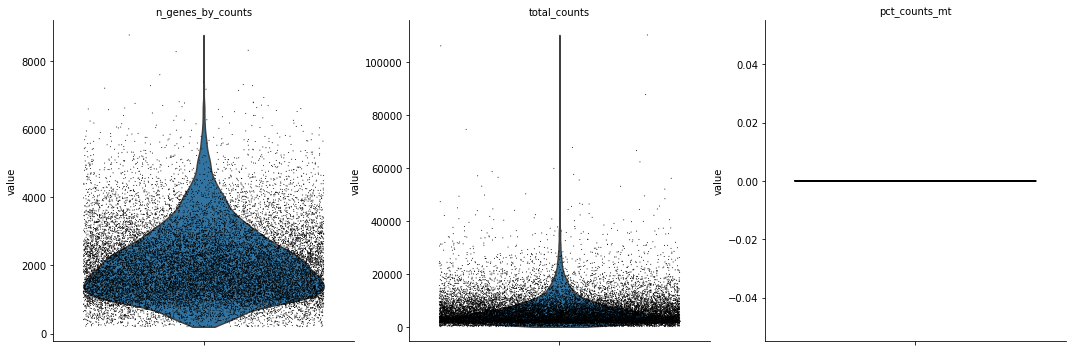

AnnData object with n_obs × n_vars = 18411 × 20153
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

In [ ]:
# 过滤线粒体基因
scRNA_seq.var['mt'] = scRNA_seq.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(scRNA_seq, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(scRNA_seq, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
scRNA_seq

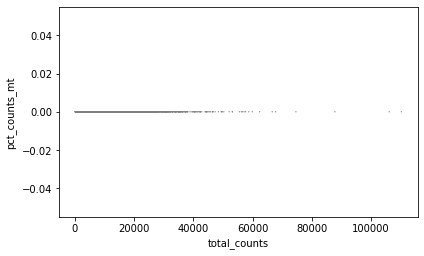

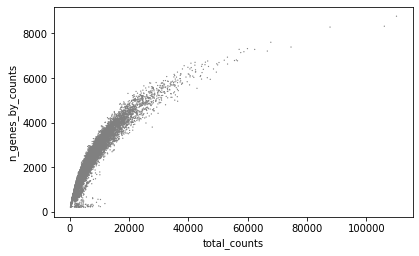

AnnData object with n_obs × n_vars = 18411 × 20153
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

In [ ]:
# 观察分布
sc.pl.scatter(scRNA_seq, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(scRNA_seq, x='total_counts', y='n_genes_by_counts')
scRNA_seq

In [ ]:
# 根据分布过滤细胞
scRNA_seq = scRNA_seq[scRNA_seq.obs.n_genes_by_counts < 6000, :]
scRNA_seq = scRNA_seq[scRNA_seq.obs.pct_counts_mt < 10, :]
scRNA_seq

View of AnnData object with n_obs × n_vars = 18350 × 20153
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


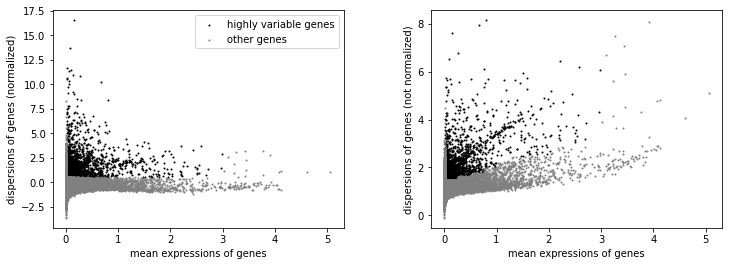

In [ ]:
# 高变基因计算
sc.pp.normalize_total(scRNA_seq, target_sum=1e4)
sc.pp.log1p(scRNA_seq)
sc.pp.highly_variable_genes(scRNA_seq, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(scRNA_seq)

In [ ]:
scRNA_seq.raw = scRNA_seq
scRNA_seq = scRNA_seq[:, scRNA_seq.var.highly_variable]
scRNA_seq

View of AnnData object with n_obs × n_vars = 18350 × 2935
    obs: 'Stem_Cell_Property', 'Myocardial_infarction', 'Operation_time', 'Type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [ ]:
sc.pp.regress_out(scRNA_seq, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(scRNA_seq, max_value=10)

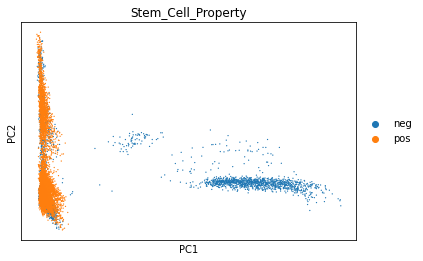

In [ ]:
sc.tl.pca(scRNA_seq, svd_solver='arpack')
sc.pl.pca(scRNA_seq, color='Stem_Cell_Property')

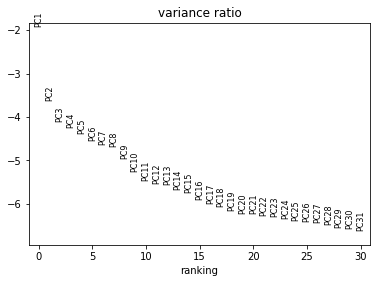

In [ ]:
sc.pl.pca_variance_ratio(scRNA_seq, log=True)

In [ ]:
sc.pp.neighbors(scRNA_seq, n_neighbors=20, n_pcs=40)
sc.tl.leiden(scRNA_seq)

In [ ]:
sc.tl.paga(scRNA_seq)
sc.pl.paga(scRNA_seq, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(scRNA_seq, init_pos='paga')

In [ ]:
!pip install werkzeug==2.0.3

     |████████████████████████████████| 289 kB 4.3 MB/s 
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 1.0.1
    Uninstalling Werkzeug-1.0.1:
      Successfully uninstalled Werkzeug-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Werkzeug<2.0,>=0.15, but you have werkzeug 2.0.3 which is incompatible.


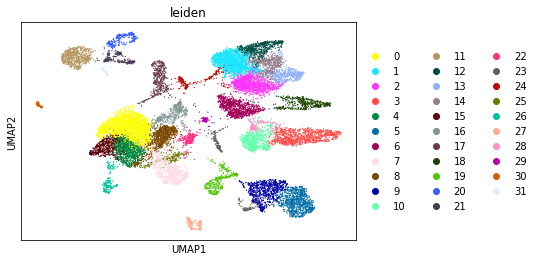

In [ ]:
sc.pl.umap(scRNA_seq, color=['leiden'])

In [ ]:
sc.tl.rank_genes_groups(scRNA_seq, 'leiden', method='t-test')
sc.pl.rank_genes_groups(scRNA_seq, n_genes=25, sharey=False)

In [ ]:
scRNA_seq.write_h5ad('/content/drive/MyDrive/MI/scRNA_seq_MI1_pre.h5ad',compression="gzip")

# scATAC-seq Data Preprocess

In [ ]:
scATAC_seq =anndata.read_h5ad("/content/drive/MyDrive/MI/GSE153479_atac.h5ad")

In [ ]:
scATAC_seq.obs['Type']=1
scATAC_seq.obs.loc[scATAC_seq.obs[scATAC_seq.obs.index.str.contains('1')].index.tolist(),'Type'] = 'P1+3 dpi'
scATAC_seq.obs.loc[scATAC_seq.obs[scATAC_seq.obs.index.str.contains('2')].index.tolist(),'Type'] = 'P1+3 dps'
scATAC_seq.obs.loc[scATAC_seq.obs[scATAC_seq.obs.index.str.contains('3')].index.tolist(),'Type'] = 'P8+3 dpi'
scATAC_seq.obs.loc[scATAC_seq.obs[scATAC_seq.obs.index.str.contains('4')].index.tolist(),'Type'] = 'P8+3 dps'
scATAC_seq.obs

,Type
AAACGAAAGAACGTTA-3,P8+3 dpi
AAACGAAAGACTAATG-2,P1+3 dps
AAACGAAAGAGCCACA-4,P8+3 dps
AAACGAAAGAGCCTGA-4,P8+3 dps
AAACGAAAGAGTTCGG-4,P8+3 dps
...,...
TTTGTGTTCTGTGTCC-1,P1+3 dpi
TTTGTGTTCTTAAGCG-3,P8+3 dpi
TTTGTGTTCTTAAGCG-4,P8+3 dps
TTTGTGTTCTTACTCA-4,P8+3 dps


In [ ]:
# 设置是否存在干细胞性质（一般认为前七天的小鼠心肌细胞才具有干细胞性质）
scATAC_seq.obs['Stem_Cell_Property']=1
scATAC_seq.obs.loc[scATAC_seq.obs[scATAC_seq.obs.Type.str.contains('P8')].index.tolist(),'Stem_Cell_Property']='neg'
scATAC_seq.obs.loc[scATAC_seq.obs[scATAC_seq.obs.Type.str.contains('P1')].index.tolist(),'Stem_Cell_Property']='pos'

In [ ]:
# 设置是否手术导致心梗 MI即手术致心梗 Sham即假手术（手术，但不导致心梗）
scATAC_seq.obs['Myocardial_infarction']=1
scATAC_seq.obs.loc[scATAC_seq.obs[scATAC_seq.obs.Type.str.contains('dpi')].index.tolist(),'Myocardial_infarction']='MI'
scATAC_seq.obs.loc[scATAC_seq.obs[scATAC_seq.obs.Type.str.contains('dps')].index.tolist(),'Myocardial_infarction']='Sham'

In [ ]:
!pip install episcanpy
import episcanpy as epi

In [ ]:
#!wget ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_31/gencode.v31.chr_patch_hapl_scaff.annotation.gtf.gz
!wget ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz
#!wget ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_38/gencode.v38.annotation.gtf.gz

--2022-04-15 15:03:58--  ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz
           => ‘gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz.1’
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.138|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/databases/gencode/Gencode_mouse/release_M25 ... done.
==> SIZE gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz ... 28867067
==> PASV ... done.    ==> RETR gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz ... done.
Length: 28867067 (28M) (unauthoritative)

gencode.vM25.chr_pa 100%[===================>]  27.53M  8.70MB/s    in 4.2s    

2022-04-15 15:04:06 (6.62 MB/s) - ‘gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz.1’ saved [28867067]



In [ ]:
!gunzip gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz

gzip: gencode.vM25.chr_patch_hapl_scaff.annotation.gtf already exists; do you wish to overwrite (y or n)? y




y


In [ ]:
epi.tl.find_genes(scATAC_seq,
           gtf_file='gencode.vM25.chr_patch_hapl_scaff.annotation.gtf',
           key_added='transcript_annotation',
           upstream=2000,
           feature_type='transcript',
           annotation='HAVANA',
           raw=False)

In [ ]:
epi.pp.filter_cells(scATAC_seq, min_features=100)
epi.pp.filter_features(scATAC_seq, min_cells=10)

In [ ]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


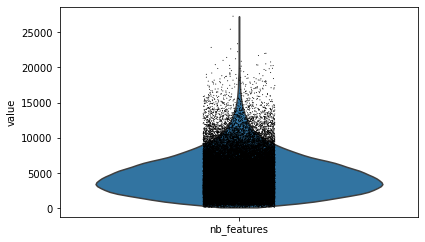

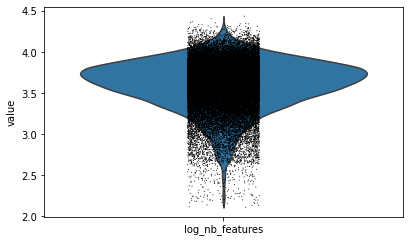

In [ ]:
scATAC_seq.obs['log_nb_features'] = [np.log10(x) for x in scATAC_seq.obs['nb_features']]
epi.pl.violin(scATAC_seq, ['nb_features'])
epi.pl.violin(scATAC_seq, ['log_nb_features'])

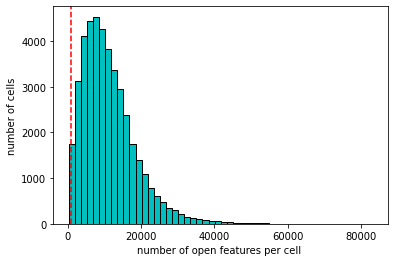

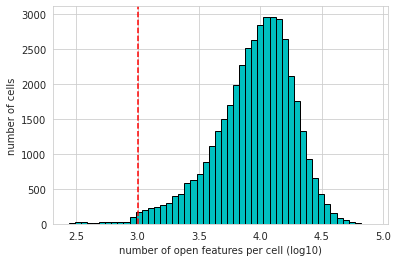

In [ ]:
# set a minimum number of cells to keep 
min_features = 1000

epi.pp.coverage_cells(scATAC_seq, binary=True, log=False, bins=50,
               threshold=min_features, save='Buenrostro_bulk_peaks_coverage_cells.png')
epi.pp.coverage_cells(scATAC_seq, binary=True, log=10, bins=50,
               threshold=min_features, save='Buenrostro_bulk_peaks_coverage_cells_log10.png')

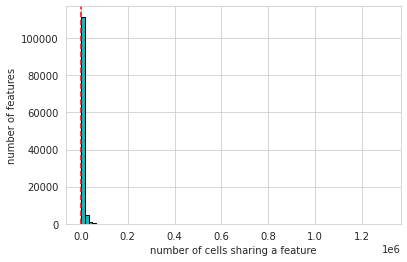

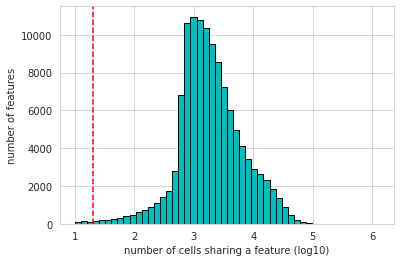

In [ ]:
# minimum number of cells sharing a feature
min_cells = 20
epi.pp.coverage_features(scATAC_seq, binary=True, log=False, 
                        threshold=min_cells, save='Buenrostro_bulk_peaks_coverage_peaks.png')
epi.pp.coverage_features(scATAC_seq, binary=True, log=True, 
                        threshold=min_cells, save='Buenrostro_bulk_peaks_coverage_peaks_log10.png')

In [ ]:
min_cells = 20
epi.pp.filter_features(scATAC_seq, min_cells=min_cells)

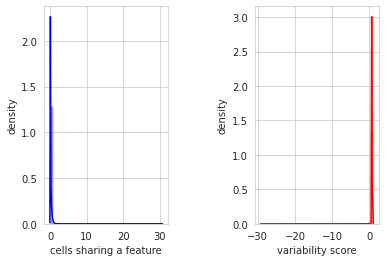

AnnData object with n_obs × n_vars = 42478 × 117419
    obs: 'Type', 'Stem_Cell_Property', 'Myocardial_infarction', 'nb_features', 'log_nb_features'
    var: 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'omic'

In [ ]:
epi.pp.cal_var(scATAC_seq)
scATAC_seq

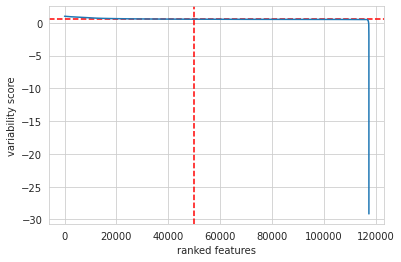

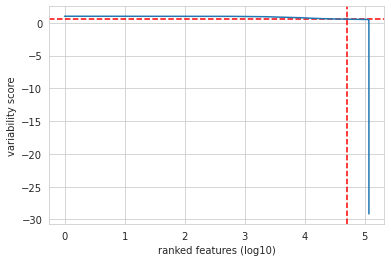

In [ ]:
min_score_value = 0.515
nb_feature_selected = 50000
epi.pl.variability_features(scATAC_seq,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_bonemarrow_peakmatrix.png')

epi.pl.variability_features(scATAC_seq,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_bonemarrow_peakmatrix_log10.png')

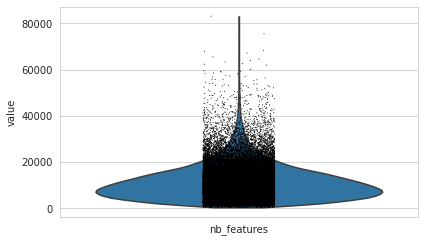

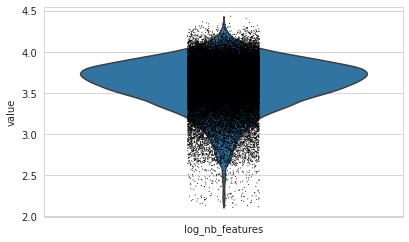

In [ ]:
scATAC_seq.raw=scATAC_seq
# create a new AnnData containing only the most variable features
scATAC_seq = epi.pp.select_var_feature(scATAC_seq,nb_features=nb_feature_selected,show=False,copy=True)
epi.pl.violin(scATAC_seq, ['nb_features'])
epi.pl.violin(scATAC_seq, ['log_nb_features'])

In [ ]:
!pip install scanpy
!pip install matplotlib
import scanpy as sc
from matplotlib import rcParams

  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


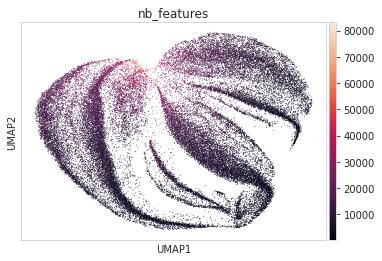

In [ ]:
epi.pp.lazy(scATAC_seq)
sc.pl.umap(scATAC_seq, color=['nb_features'], wspace=0.3)

In [ ]:
scATAC_seq.layers['binary'] = scATAC_seq.X.copy()
scATAC_seq[4,].X.todense()

matrix([[0., 0., 0., ..., 0., 1., 2.]], dtype=float32)

In [ ]:
scATAC_seq.write_h5ad('/content/drive/MyDrive/MI/scATAC_seq_MI1_pre.h5ad',compression="gzip")

# scRNA_seq Glue

In [ ]:
scRNA_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq_MI1_pre.h5ad")

In [ ]:
!wget ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M25/gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz

In [ ]:
import scglue

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
scglue.data.get_gene_annotation(
    scRNA_seq, gtf="gencode.vM25.chr_patch_hapl_scaff.annotation.gtf.gz",
    gtf_by="gene_name"
)
scRNA_seq.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()

In [ ]:
scRNA_seq.write_h5ad('/content/drive/MyDrive/MI/scRNA_seq_MI1.h5ad',compression="gzip")

# scATAC_seq Glue

In [ ]:
scATAC_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_MI1_pre.h5ad")

In [ ]:
scATAC_seq.X, scATAC_seq.X.data

(<42478x50017 sparse matrix of type '<class 'numpy.float32'>'
 	with 159106086 stored elements in Compressed Sparse Column format>,
 array([2., 2., 2., ..., 2., 2., 2.], dtype=float32))

In [ ]:
scglue.data.lsi(scATAC_seq, n_components=100, n_iter=15)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


In [ ]:
sc.pp.neighbors(scATAC_seq, use_rep="X_lsi", metric="cosine")
sc.tl.umap(scATAC_seq)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
split = scATAC_seq.var_names.str.split(r"[_]")
scATAC_seq.var["chrom"] = split.map(lambda x: x[0])
scATAC_seq.var["chromStart"] = split.map(lambda x: x[1])
scATAC_seq.var["chromEnd"] = split.map(lambda x: x[2])
scATAC_seq.var.head()

,transcript_annotation,n_cells,commonness,prop_shared_cells,variability_score,chrom,chromStart,chromEnd
chr1_3119499_3120751,intergenic,6399.0,6399.0,0.150643,0.650643,chr1,3119499,3120751
chr1_3121254_3121794,intergenic,2552.0,2552.0,0.060078,0.560078,chr1,3121254,3121794
chr1_3670570_3672308,Xkr4,8457.0,8457.0,0.199091,0.699091,chr1,3670570,3672308
chr1_4077274_4077869,Rp1,2352.0,2352.0,0.055370,0.555370,chr1,4077274,4077869
chr1_4426777_4427710,intergenic,3278.0,3278.0,0.077169,0.577169,chr1,4426777,4427710


In [ ]:
scATAC_seq

AnnData object with n_obs × n_vars = 42478 × 50017
    obs: 'Type', 'Stem_Cell_Property', 'Myocardial_infarction', 'nb_features', 'log_nb_features'
    var: 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score', 'chrom', 'chromStart', 'chromEnd'
    uns: 'neighbors', 'omic', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_lsi'
    varm: 'PCs'
    layers: 'binary'
    obsp: 'connectivities', 'distances'

In [ ]:
scATAC_seq.write_h5ad('/content/drive/MyDrive/MI/scATAC_seq_MI1.h5ad',compression="gzip")